In [9]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### UNZIPPING THE FILE/FOLDER

In [2]:
path_to_zip_file = "./sample_data/capcha_data.zip"
directory_to_extract_to = "./sample_data"

In [3]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

## Data Preprocessing

In [21]:
img_folder = "./sample_data/capcha_data/"

In [22]:
number_of_files = len(img_folder)
number_of_files

26

In [23]:
img_folder_two = "./sample_data/capcha_data/samples"

In [24]:
number_of_files_two = len(img_folder_two)
number_of_files_two

33

### Counting the files into the folder

In [10]:
def count_images(images_folder):
  if not os.path.exists(images_folder):
    print(f"Error: Folder '{images_folder}' does not exist.")
    return 0

  try:
    file_list = os.listdir(images_folder)
    file_count = len([f for f in file_list if os.path.isfile(os.path.join(images_folder, f))])
    return file_count
  except OSError as e:
    print(f"Error accessing folder: {e}")
    return 0

In [11]:
number_of_images_primary = count_images(img_folder)

if number_of_images_primary > 0:
  print(f"There are {number_of_images_primary} images in the folder.")
else:
  print("The folder is empty or there was an error accessing it.")

There are 1070 images in the folder.


In [15]:
number_of_images_secondary = count_images(img_folder_two)

if number_of_images_secondary > 0:
  print(f"There are {number_of_images_secondary} images in the folder.")
else:
  print("The folder is empty or there was an error accessing it.")

There are 1070 images in the folder.


#### Here we can see there is another duplicate folder called samples into the dataset. lets remove it.

In [16]:
folder_to_delete = img_folder_two

try:
  os.rmdir(folder_to_delete)
  print(f"Folder '{folder_to_delete}' deleted successfully.")
except OSError as e:
  if e.errno == 39:
    print(f"Error: Folder '{folder_to_delete}' is not empty. Use shutil.rmtree() for non-empty folders.")
  else:
    print(f"Error deleting folder: {e}")

Error: Folder './sample_data/capcha_data/samples' is not empty. Use shutil.rmtree() for non-empty folders.


In [17]:
import shutil

folder_to_delete = img_folder_two

try:
  shutil.rmtree(folder_to_delete)
  print(f"Folder '{folder_to_delete}' and its contents deleted successfully.")
except OSError as e:
  print(f"Error deleting folder: {e}")

Folder './sample_data/capcha_data/samples' and its contents deleted successfully.


### Lets grab some photo to see, how it is look like

In [19]:
import matplotlib.image as mpimg

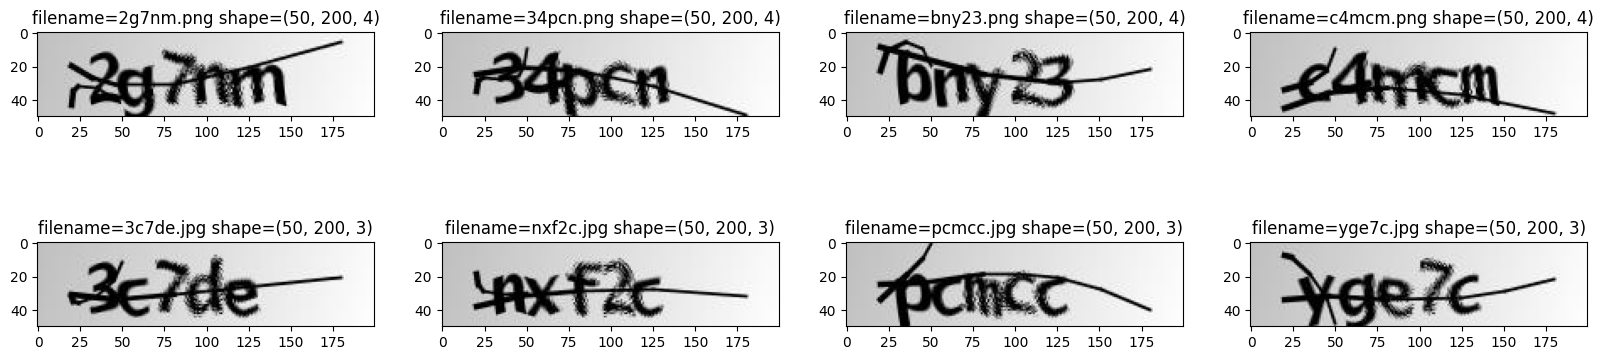

In [25]:
img_2g7nm = mpimg.imread(img_folder + '2g7nm.png')
img_34pcn = mpimg.imread(img_folder + '34pcn.png')
img_bny23 = mpimg.imread(img_folder + 'bny23.png')
img_c4mcm = mpimg.imread(img_folder + 'c4mcm.png')
img_3c7de = mpimg.imread(img_folder + '3c7de.jpg')
img_nxf2c = mpimg.imread(img_folder + 'nxf2c.jpg')
img_pcmcc = mpimg.imread(img_folder + 'pcmcc.jpg')
img_yge7c = mpimg.imread(img_folder + 'yge7c.jpg')
samples = {'2g7nm.png':img_2g7nm, '34pcn.png':img_34pcn, 'bny23.png':img_bny23, 'c4mcm.png':img_c4mcm,
           '3c7de.jpg':img_3c7de, 'nxf2c.jpg':img_nxf2c, 'pcmcc.jpg':img_pcmcc, 'yge7c.jpg':img_yge7c}

fig=plt.figure(figsize=(20, 5))
pos = 1
for filename, img in samples.items():
    fig.add_subplot(2, 4, pos)
    pos = pos+1
    plt.imshow(img)
    plt.title('filename='+filename+' shape='+str(img.shape))
plt.show()

### Making DataFrame

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame(columns=['filename','extension','label','labelsize','char1','char2','char3','char4','char5'])
i = 0
for _, _, files in os.walk(img_folder):
    for f in files:
        df.loc[i,'filename'] = f
        df.loc[i,'extension'] = f.split('.')[1]
        df.loc[i,'label'] = f.split('.')[0]
        df.loc[i,'labelsize'] = len(f.split('.')[0])
        df.loc[i,'char1'] = f.split('.')[0][0]
        df.loc[i,'char2'] = f.split('.')[0][1]
        df.loc[i,'char3'] = f.split('.')[0][2]
        df.loc[i,'char4'] = f.split('.')[0][3]
        df.loc[i,'char5'] = f.split('.')[0][4]
        i = i+1

In [30]:
df.head()

,filename,extension,label,labelsize,char1,char2,char3,char4,char5
0,xdn65.png,png,xdn65,5,x,d,n,6,5
1,6pfy4.png,png,6pfy4,5,6,p,f,y,4
2,5fyem.png,png,5fyem,5,5,f,y,e,m
3,8bbm4.png,png,8bbm4,5,8,b,b,m,4
4,fw3b2.png,png,fw3b2,5,f,w,3,b,2


In [31]:
df.tail()

,filename,extension,label,labelsize,char1,char2,char3,char4,char5
1065,5p8fm.png,png,5p8fm,5,5,p,8,f,m
1066,wm746.png,png,wm746,5,w,m,7,4,6
1067,fc2ff.png,png,fc2ff,5,f,c,2,f,f
1068,6p7gx.png,png,6p7gx,5,6,p,7,g,x
1069,y5dpp.png,png,y5dpp,5,y,5,d,p,p


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   1070 non-null   object
 1   extension  1070 non-null   object
 2   label      1070 non-null   object
 3   labelsize  1070 non-null   object
 4   char1      1070 non-null   object
 5   char2      1070 non-null   object
 6   char3      1070 non-null   object
 7   char4      1070 non-null   object
 8   char5      1070 non-null   object
dtypes: object(9)
memory usage: 115.9+ KB


### Plotting Character VS Count

In [34]:
import seaborn as sns

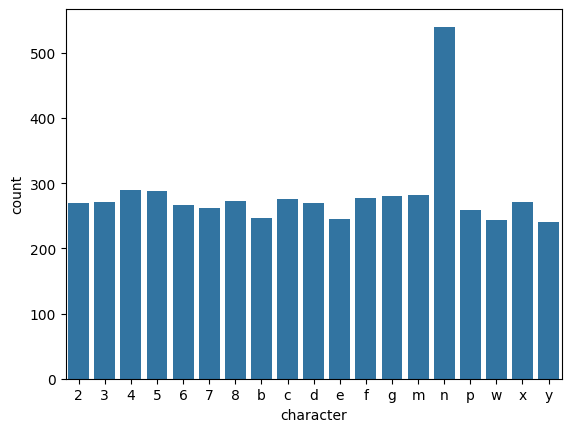

In [35]:
data = pd.DataFrame(df['char1'].value_counts()+df['char2'].value_counts()+df['char3'].value_counts()+df['char4'].value_counts()+df['char5'].value_counts()).reset_index()
data.columns = ['character','count']

sns.barplot(data=data, x='character', y='count')
plt.show()

# Training and Validation of Dataset

In [36]:
# Dictionaries that will be used to convert characters to integers and vice-versa
vocabulary = {'2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y'}
char_to_num = {'2':0,'3':1,'4':2,'5':3,'6':4,'7':5,'8':6,'b':7,'c':8,'d':9,'e':10,'f':11,'g':12,'m':13,'n':14,'p':15,'w':16,'x':17,'y':18}

In [37]:
def encode_single_sample(img_path, label, crop):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    if(crop==True):
        img = tf.image.crop_to_bounding_box(img, offset_height=0, offset_width=25, target_height=50, target_width=125)
        img = tf.image.resize(img,size=[50,200],method='bilinear', preserve_aspect_ratio=False,antialias=False, name=None)
    img = tf.transpose(img, perm=[1, 0, 2])
    label = list(map(lambda x:char_to_num[x], label))
    return img.numpy(), label

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
def create_train_and_validation_datasets(crop=False):
    X, y = [],[]

    for _, _, files in os.walk(img_folder):
        for f in files:
            label = f.split('.')[0]
            extension = f.split('.')[1]
            if extension=='png':
                img, label = encode_single_sample(img_folder+f, label,crop)
                X.append(img)
                y.append(label)

    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X.reshape(1040, 10000), y, test_size=0.1, shuffle=True, random_state=42)
    X_train, X_val = X_train.reshape(936,200,50,1), X_val.reshape(104,200,50,1)
    return X_train, X_val, y_train, y_val

## Checking Few Examples

In [45]:
X_train, X_val, y_train, y_val = create_train_and_validation_datasets(crop=True)
X_train_, X_val_, y_train_, y_val_ = create_train_and_validation_datasets(crop=False)


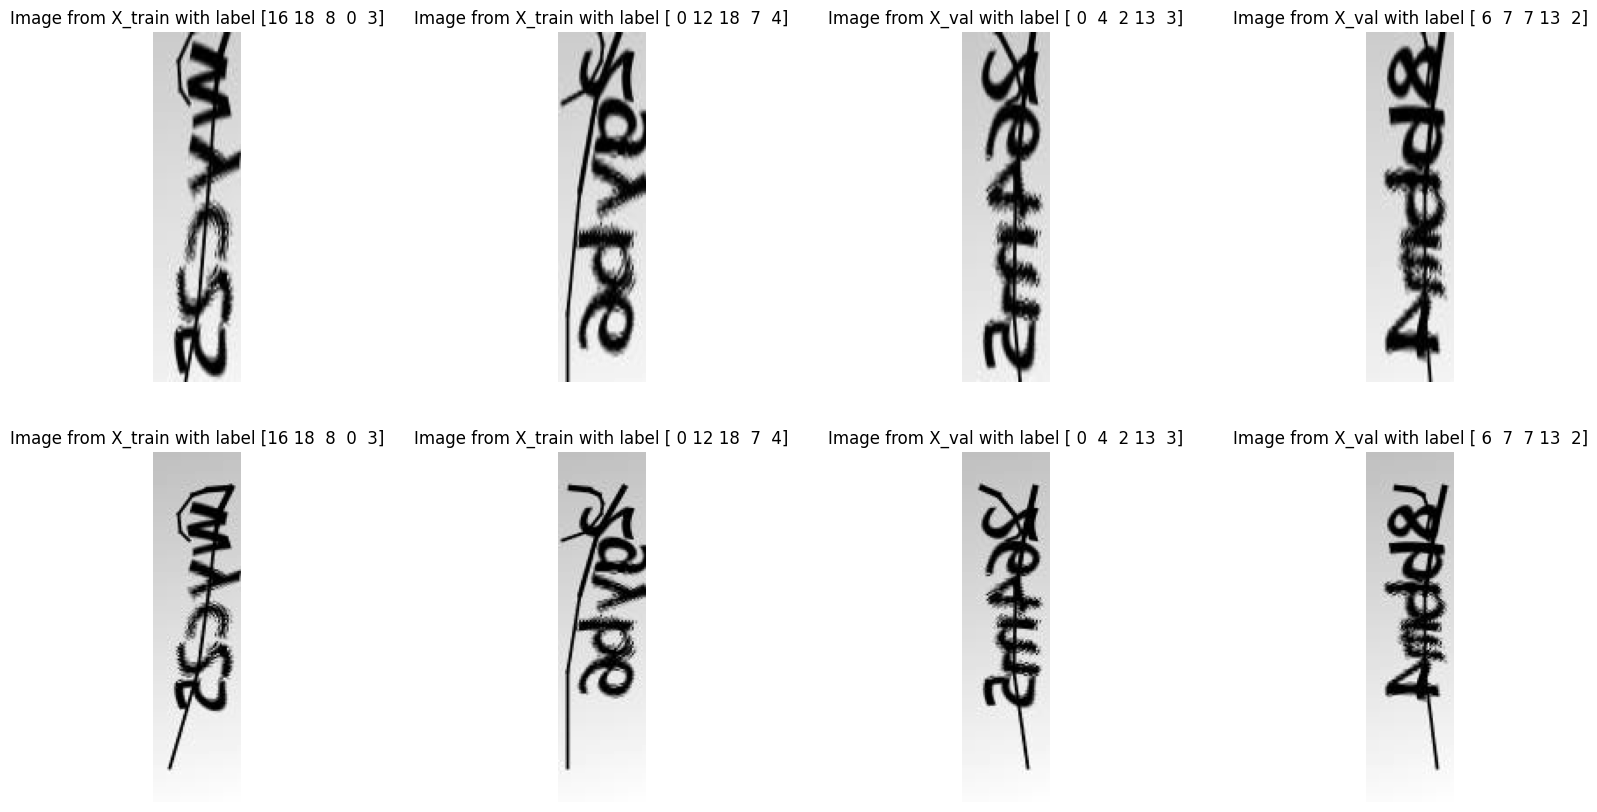

In [47]:
fig=plt.figure(figsize=(20, 10))
fig.add_subplot(2, 4, 1)
plt.imshow(X_train[0], cmap='gray')

plt.title('Image from X_train with label '+ str(y_train[0]))
plt.axis('off')
fig.add_subplot(2, 4, 2)
plt.imshow(X_train[935], cmap='gray')

plt.title('Image from X_train with label '+ str(y_train[935]))
plt.axis('off')
fig.add_subplot(2, 4, 3)
plt.imshow(X_val[0], cmap='gray')

plt.title('Image from X_val with label '+ str(y_val[0]))
plt.axis('off')
fig.add_subplot(2, 4, 4)
plt.imshow(X_val[103], cmap='gray')

plt.title('Image from X_val with label '+ str(y_val[103]))
plt.axis('off')

fig.add_subplot(2, 4, 5)
plt.imshow(X_train_[0], cmap='gray')
plt.title('Image from X_train with label '+ str(y_train_[0]))
plt.axis('off')

fig.add_subplot(2, 4, 6)
plt.imshow(X_train_[935], cmap='gray')
plt.title('Image from X_train with label '+ str(y_train_[935]))
plt.axis('off')

fig.add_subplot(2, 4, 7)
plt.imshow(X_val_[0], cmap='gray')
plt.title('Image from X_val with label '+ str(y_val_[0]))
plt.axis('off')

fig.add_subplot(2, 4, 8)
plt.imshow(X_val_[103], cmap='gray')
plt.title('Image from X_val with label '+ str(y_val_[103]))
plt.axis('off')

plt.show()

# Simple Classifier Model

In [48]:
def build_model():

    input_img = layers.Input(shape=(200,50,1), name="image", dtype="float32")

    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    x = layers.Reshape(target_shape=(5, 7680), name="reshape")(x)

    x = layers.Dense(256, activation="relu", name="dense1")(x)
    x = layers.Dense(64, activation="relu", name="dense2")(x)

    output = layers.Dense(19, activation="softmax", name="dense3")(x)

    model = keras.models.Model(inputs=input_img, outputs=output, name="ocr_classifier_based_model")
    model.compile(optimizer=keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics="accuracy")

    return model


In [50]:
from tensorflow import keras

In [51]:
model = build_model()
model.summary()

Model: "ocr_classifier_based_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 5, 7680)           0         
                                                                 
 dense1 (Dense)              (None, 5, 2

## Train the Model

In [52]:
X_train, X_val, y_train, y_val = create_train_and_validation_datasets(crop=True)
history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
30/30 [==============================] - 18s 553ms/step - loss: 3.0152 - accuracy: 0.1056 - val_loss: 2.6261 - val_accuracy: 0.1788
Epoch 2/30
30/30 [==============================] - 16s 543ms/step - loss: 2.2476 - accuracy: 0.2936 - val_loss: 1.8844 - val_accuracy: 0.4385
Epoch 3/30
30/30 [==============================] - 16s 542ms/step - loss: 1.3711 - accuracy: 0.6045 - val_loss: 1.1255 - val_accuracy: 0.6577
Epoch 4/30
30/30 [==============================] - 17s 578ms/step - loss: 0.7351 - accuracy: 0.7812 - val_loss: 0.7550 - val_accuracy: 0.7808
Epoch 5/30
30/30 [==============================] - 17s 572ms/step - loss: 0.4698 - accuracy: 0.8697 - val_loss: 0.5990 - val_accuracy: 0.8308
Epoch 6/30
30/30 [==============================] - 18s 619ms/step - loss: 0.3380 - accuracy: 0.8996 - val_loss: 0.5294 - val_accuracy: 0.8577
Epoch 7/30
30/30 [==============================] - 15s 506ms/step - loss: 0.2495 - accuracy: 0.9308 - val_loss: 0.4349 - val_accuracy: 0.8923

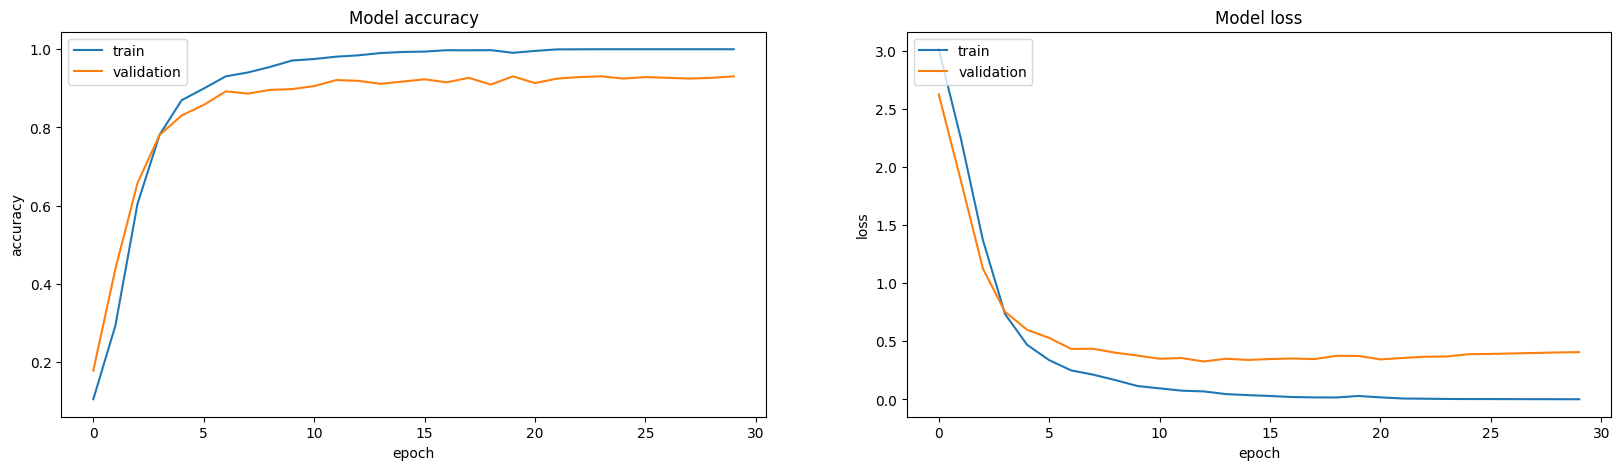

In [53]:
fig=plt.figure(figsize=(20, 5))
# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predictions

4/4 [==============================] - 1s 108ms/step


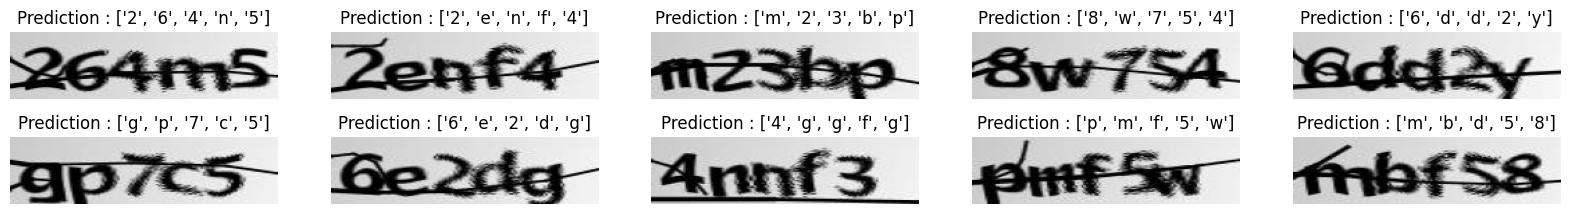

In [54]:
y_pred = model.predict(X_val) # y_pred shape = (104,50,19)
y_pred = np.argmax(y_pred, axis=2)
num_to_char = {'-1':'UKN','0':'2','1':'3','2':'4','3':'5','4':'6','5':'7','6':'8','7':'b','8':'c','9':'d','10':'e','11':'f','12':'g','13':'m','14':'n','15':'p','16':'w','17':'x','18':'y'}
nrow = 1
fig=plt.figure(figsize=(20, 5))
for i in range(0,10):
    if i>4: nrow = 2
    fig.add_subplot(nrow, 5, i+1)
    plt.imshow(X_val[i].transpose((1,0,2)),cmap='gray')
    plt.title('Prediction : ' + str(list(map(lambda x:num_to_char[str(x)], y_pred[i]))))
    plt.axis('off')
plt.show()

## Model Performance

In [56]:
def compute_perf_metric(predictions, groundtruth):
    if predictions.shape == groundtruth.shape:
        return np.sum(predictions == groundtruth)/(predictions.shape[0]*predictions.shape[1])
    else:
        raise Exception('Error : the size of the arrays do not match. Cannot compute the performance metric')

In [57]:
compute_perf_metric(y_pred, y_val)

0.9307692307692308